In [1]:
import os

# Change to parent dir to allow importation of modules
if os.path.split(os.getcwd())[1] != 'CITS4404':
    os.chdir('..')

from eLCS.Timer import Timer
from eLCS.OfflineEnvironment import OfflineEnvironment
from eLCS.Algorithm import Algorithm
from eLCS.Constants import cons

"""To run e-LCS, run this module.  

A properly formatted configuration file, including all run parameters must be included with the path to that
file given below.  In this example, the configuration file has been included locally, so only the file name is required.
"""

helpstr = """Failed attempt to run e-LCS.  Please ensure that a configuration file giving all run parameters has been specified."""

# Specify the name and file path for the configuration file.
config_txt = os.path.join('config', 'eLCS_config.yaml')

# Obtain all run parameters from the configuration file and store them in the 'Constants' module.
dataset_path = os.path.join('data', 'eLCS')
cons.setConstants(config_txt, dataset_path=dataset_path)

# Initialize the 'Timer' module which tracks the run time of algorithm and it's different components.
timer = Timer()
cons.referenceTimer(timer)

# Initialize the 'Environment' module which manages the data presented to the algorithm.  While e-LCS learns iteratively (one inistance at a time
env = OfflineEnvironment()
cons.referenceEnv(
    env)  # Passes the environment to 'Constants' (cons) so that it can be easily accessed from anywhere within the code.
cons.parseIterations()  # Identify the maximum number of learning iterations as well as evaluation checkpoints.

# Run the e-LCS algorithm.
eLCS = Algorithm()

# Get the output of runtime parameters from the eLCS
runtimeParams = eLCS.getRuntimeParams()

----------------------------------------------------------------------------
eLCS Code Demo 5: The Complete eLCS Algorithm - Niche GA + Subsumption
----------------------------------------------------------------------------
Environment: Formatting Data... 
DataManagement: Loading Data... data/eLCS/6Multiplexer_Data_Complete.txt
DataManagement: Phenotype Column Location = 6
DataManagement: Number of Attributes = 6
DataManagement: Number of Instances = 64
DataManagement: Analyzing Phenotype...
DataManagement: Phenotype Detected as Discrete.
DataManagement: Detecting Classes...
DataManagement: Following Classes Detected:['0', '1']
Class: 0 count = 32
Class: 1 count = 32
DataManagement: Detecting Attributes...
DataManagement: Identified 6 discrete and 0 continuous attributes.
DataManagement: Characterizing Attributes...
----------------------------------------------------------------------------
eLCS: Initializing Algorithm...
Learning Checkpoints: [5000, 10000]
Maximum Iterations: 10000


Epoch: 54	 Iteration: 3456	 MacroPop: 226	 MicroPop: 1000	 AccEstimate: 1.0	 AveGen: 0.5569999999999999	 Time: 0.0207235058148702
Epoch: 55	 Iteration: 3520	 MacroPop: 227	 MicroPop: 1000	 AccEstimate: 1.0	 AveGen: 0.5566666666666668	 Time: 0.021219960848490396
Epoch: 56	 Iteration: 3584	 MacroPop: 224	 MicroPop: 1000	 AccEstimate: 1.0	 AveGen: 0.5571666666666667	 Time: 0.02177496353785197
Epoch: 57	 Iteration: 3648	 MacroPop: 223	 MicroPop: 1000	 AccEstimate: 1.0	 AveGen: 0.5570000000000003	 Time: 0.02227387030919393
Epoch: 58	 Iteration: 3712	 MacroPop: 221	 MicroPop: 1000	 AccEstimate: 1.0	 AveGen: 0.5570000000000003	 Time: 0.02278639078140259
Epoch: 59	 Iteration: 3776	 MacroPop: 216	 MicroPop: 1000	 AccEstimate: 1.0	 AveGen: 0.556666666666667	 Time: 0.023281057675679524
Epoch: 60	 Iteration: 3840	 MacroPop: 218	 MicroPop: 1000	 AccEstimate: 1.0	 AveGen: 0.5555000000000002	 Time: 0.02377548615137736
Epoch: 61	 Iteration: 3904	 MacroPop: 218	 MicroPop: 1000	 AccEstimate: 1.0	 AveGen

Epoch: 117	 Iteration: 7488	 MacroPop: 222	 MicroPop: 1000	 AccEstimate: 1.0	 AveGen: 0.5411666666666669	 Time: 0.05234957933425903
Epoch: 118	 Iteration: 7552	 MacroPop: 221	 MicroPop: 1000	 AccEstimate: 1.0	 AveGen: 0.5420000000000001	 Time: 0.05287361939748128
Epoch: 119	 Iteration: 7616	 MacroPop: 224	 MicroPop: 1000	 AccEstimate: 1.0	 AveGen: 0.542	 Time: 0.053411448001861574
Epoch: 120	 Iteration: 7680	 MacroPop: 226	 MicroPop: 1000	 AccEstimate: 1.0	 AveGen: 0.5413333333333333	 Time: 0.05391797224680583
Epoch: 121	 Iteration: 7744	 MacroPop: 230	 MicroPop: 1000	 AccEstimate: 1.0	 AveGen: 0.5418333333333333	 Time: 0.05443344513575236
Epoch: 122	 Iteration: 7808	 MacroPop: 226	 MicroPop: 1000	 AccEstimate: 1.0	 AveGen: 0.5408333333333333	 Time: 0.05497846206029256
Epoch: 123	 Iteration: 7872	 MacroPop: 224	 MicroPop: 1000	 AccEstimate: 1.0	 AveGen: 0.5399999999999998	 Time: 0.05550031264623006
Epoch: 124	 Iteration: 7936	 MacroPop: 224	 MicroPop: 1000	 AccEstimate: 1.0	 AveGen: 0.

In [2]:
print(runtimeParams[0])

#  Generate lists for plotting
epoch_list = [i['epoch'] for i in runtimeParams]
iter_list = [i['iteration'] for i in runtimeParams]
acc_list = [i['acc_estimate'] for i in runtimeParams]
ave_gen_list = [i['ave_gen'] for i in runtimeParams]
micro_list = [i['micro_pop'] for i in runtimeParams]
macro_list = [i['macro_pop'] for i in runtimeParams]

{'time': 9.662310282389323e-05, 'macro_pop': 30, 'ave_gen': 0.4895833333333333, 'epoch': 1, 'acc_estimate': 0.6875, 'iteration': 64, 'micro_pop': 32}


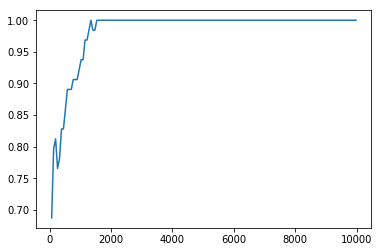

In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.plot(iter_list, acc_list)

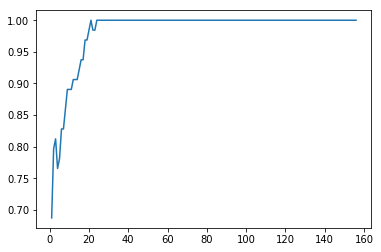

In [4]:
plt.plot(epoch_list, acc_list)

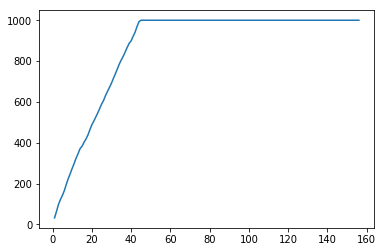

In [5]:
plt.plot(epoch_list, micro_list)

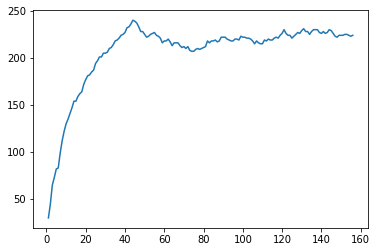

In [6]:
plt.plot(epoch_list, macro_list)

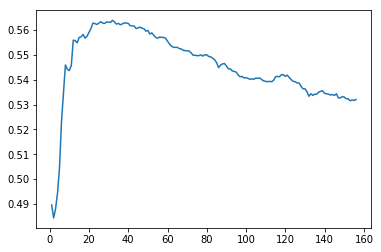

In [7]:
plt.plot(epoch_list, ave_gen_list)